In [1]:
import logging
import sys
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))

from lib.power_system import SolarFarm, KRUSTYReactor, Battery, PowerConsumingSubsystem, PowerDistributionManagementSystem

In [2]:
# Initialize components
solar_farm = SolarFarm(
    name='Solar Farm',
    max_output_kw=100,
    efficiency=0.2,
    martian_year_hours=24 * 668.6,
    on_duration=12,
    off_duration=12,
)

krusty_reactors = [
    KRUSTYReactor(
        name='KRUSTY-1',
        max_output_kw=10,
        efficiency=0.5,
        burnup_rate=0.0001,
        operational_uptime=0.8,
        maintenance_schedule=[0, 100, 200, 300, 400, 500, 600, 700],
    ),
    KRUSTYReactor(
        name='KRUSTY-2',
        max_output_kw=10,
        efficiency=0.5,
        burnup_rate=0.0001,
        operational_uptime=0.8,
        maintenance_schedule=[0, 100, 200, 300, 400, 500, 600, 700],
    ),
]
battery = Battery(capacity_kj=1e5, level_kj=0.5e4, charge_efficiency=0.9, discharge_efficiency=0.9, degradation_rate=0.0001)

# Create subsystems
subsystems = [
    PowerConsumingSubsystem(
        name='Life Support',
        power_demand_kj=10000,
        criticality_level=1,
        operational_hours=list(range(24))
    ),
    PowerConsumingSubsystem(
        name='Communications',
        power_demand_kj=5000,
        criticality_level=2,
        operational_hours=list(range(8, 20))
    ),
    PowerConsumingSubsystem(
        name='Science',
        power_demand_kj=20000,
        criticality_level=3,
        operational_hours=list(range(8, 16))
    ),
    PowerConsumingSubsystem(
        name='Propulsion',
        power_demand_kj=30000,
        criticality_level=4,
        operational_hours=list(range(0, 24))
    ),
]

# Initialize power distribution management system
pdms = PowerDistributionManagementSystem(solar_farm, krusty_reactors, battery)
for subsystem in subsystems:
    pdms.add_subsystem(subsystem)

# Simulation loop
total_simulation_hours = 1000
for hour in range(total_simulation_hours):
    pdms.distribute_power(hour)

# After simulation, access the metrics DataFrame
display(pdms.metrics)

Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level critically low. Implementing load shedding.
Battery level 

,hour,total_generation_kj,total_consumption_kj,battery_soc,load_shedding
0,0,66762.245304,40000,0.290860,
1,1,144487.367013,40000,1.000000,
2,2,140572.086305,40000,1.000000,
3,3,67991.242190,40000,1.000000,
4,4,147739.132311,40000,1.000000,
...,...,...,...,...,...
995,995,131652.977011,65000,1.000000,
996,996,32414.400000,65000,0.600117,
997,997,64821.600000,65000,0.597987,
998,998,32407.200000,65000,0.197896,


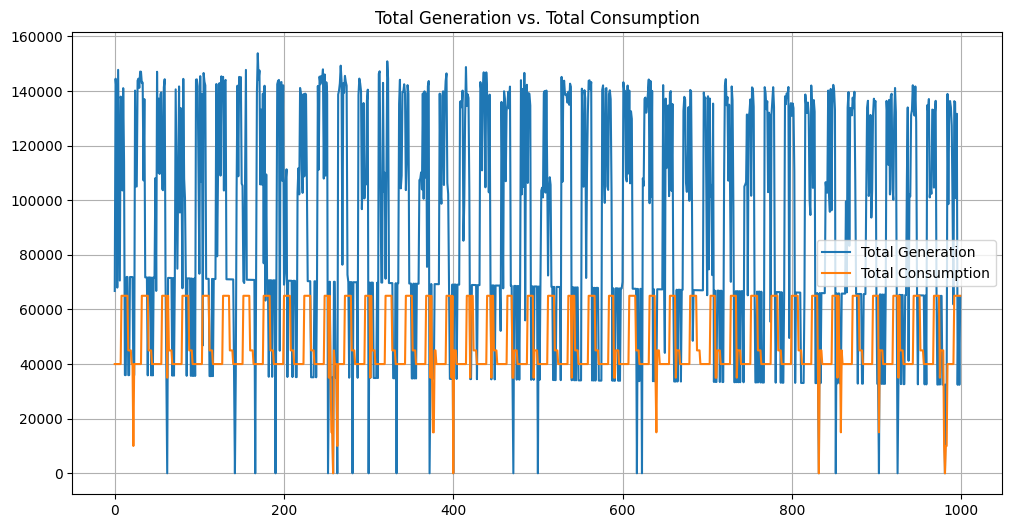

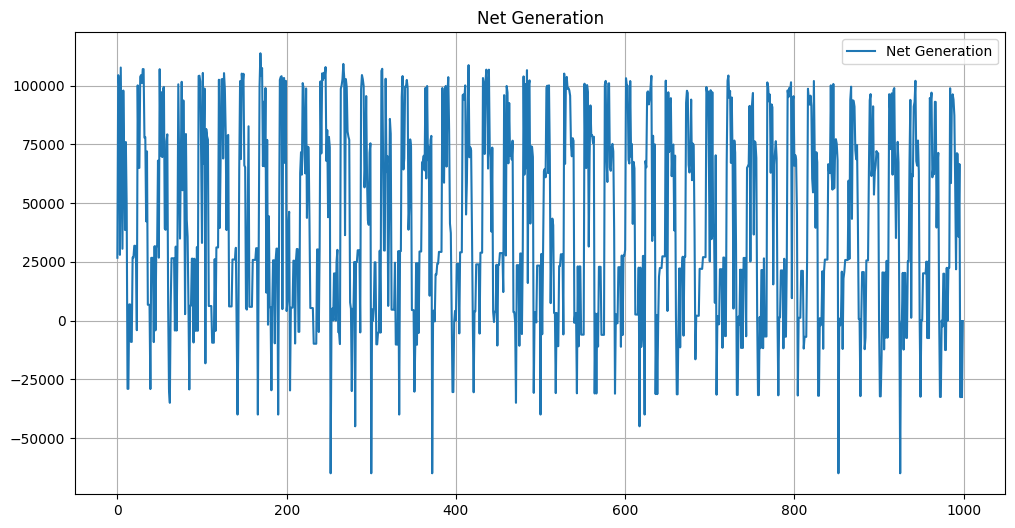

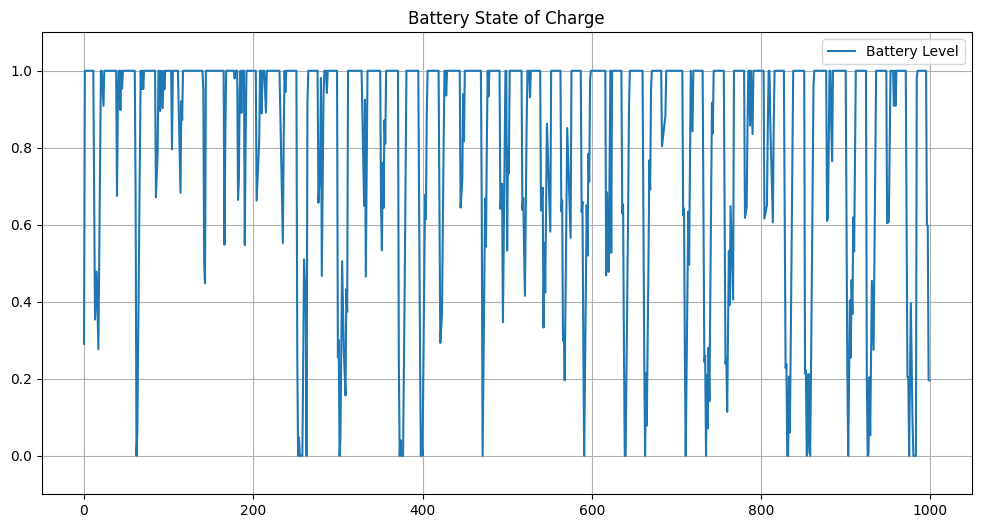

In [4]:
f = plt.figure(figsize=(12, 6))
pdms.metrics.total_generation_kj.plot(label='Total Generation')
pdms.metrics.total_consumption_kj.plot(label='Total Consumption')
plt.legend()
plt.grid()
plt.title('Total Generation vs. Total Consumption')
plt.show()

f = plt.figure(figsize=(12, 6))
(pdms.metrics.total_generation_kj - pdms.metrics.total_consumption_kj).plot(label='Net Generation')
plt.legend()
plt.grid()
plt.title('Net Generation')
plt.show()

f = plt.figure(figsize=(12, 6))
pdms.metrics.battery_soc.plot(label='Battery Level')
plt.legend()
plt.grid()
plt.ylim(-0.1, 1.1)
plt.title('Battery State of Charge')
plt.show()